# Central Limit Theorem

Discussion with

- statement and discussion on CLT
- aim of this work
- approach

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, probplot

In [3]:
a = 1.99
seed = 7654321
np.random.seed(seed)

mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
print(f'Mean : {mean}, Variance : {var}')

Mean : 1.99, Variance : 1.99


In [4]:
x_min, x_max = gamma.ppf(0.0,a), gamma.ppf(0.999,a)
x = np.linspace(x_min, x_max, 200)
p_x = gamma.pdf(x,a)

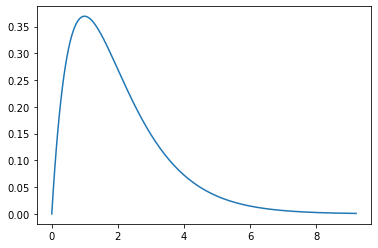

In [5]:
fig, ax = plt.subplots(1,1)
ax.plot(x,p_x);

In [6]:
def sample_means(no_of_samples=100, size=10, a=1.99):
    sample_means = np.zeros(no_of_samples)
    for i in range(no_of_samples):
        sample = np.mean(gamma.rvs(a, size=size))
        sample_means[i] = np.mean(sample)
    return sample_means

In [7]:
sample_means_data = sample_means(no_of_samples=10_000)

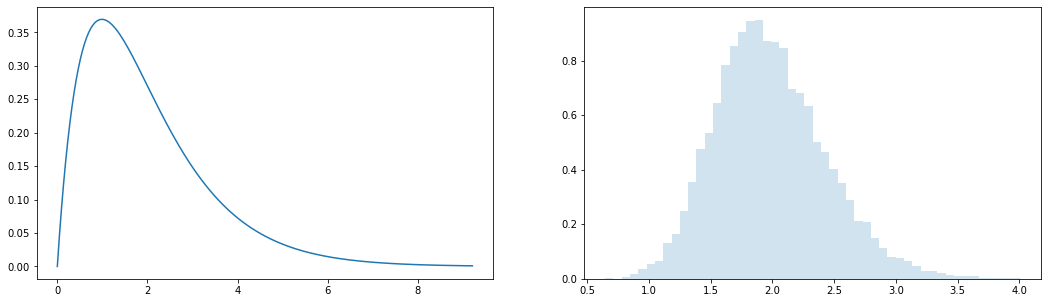

In [8]:
fig, ax = plt.subplots(1,2, figsize=(18,5))
ax[0].plot(x,p_x)
ax[1].hist(sample_means_data, bins=50, density=True, histtype='stepfilled', alpha=0.2);

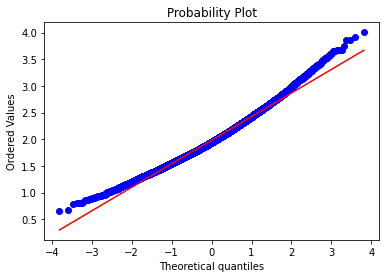

In [9]:
probplot(sample_means_data, plot=plt);

## Examination of size dependece of sample-mean variance.

In [10]:
sample_sizes = [10,100,1000,10_000,100_000]

In [11]:
sample_std = []
for i in sample_sizes:
    sample = sample_means(size=i)
    sample_std.append(np.std(sample))

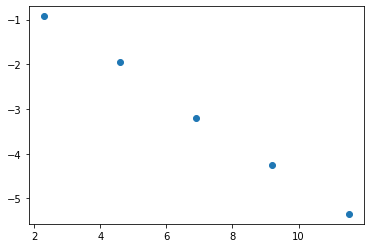

In [12]:
log_sizes = np.log(sample_sizes)
log_std = np.log(sample_std)
plt.scatter(log_sizes, log_std);